## AllLife Credit Card Customer Segmentation

<b>Background:</b> AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the back poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.

<b> Objective: </b> To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

<b> Key Questions: </b>
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and
service these customers?

In [67]:
### importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_score

In [2]:
### reading data
df = pd.read_excel('Credit Card Customer Data.xlsx')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [4]:
df.shape

(660, 7)

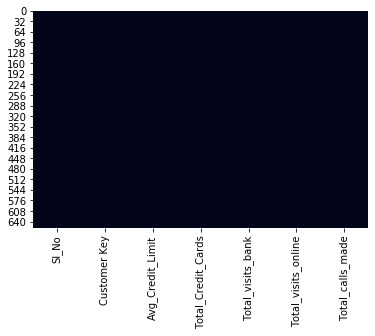

In [5]:
##verifying for missing data
sns.heatmap(df.isnull(), cbar=False);

Good, no missing data

In [6]:
df_data = df[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_online','Total_calls_made']]

### 1 - Univariate Analysis.

In [7]:
df_data.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.606061,3.583333
std,37625.487804,2.167835,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,5.000000
max,200000.000000,10.000000,15.000000,10.000000


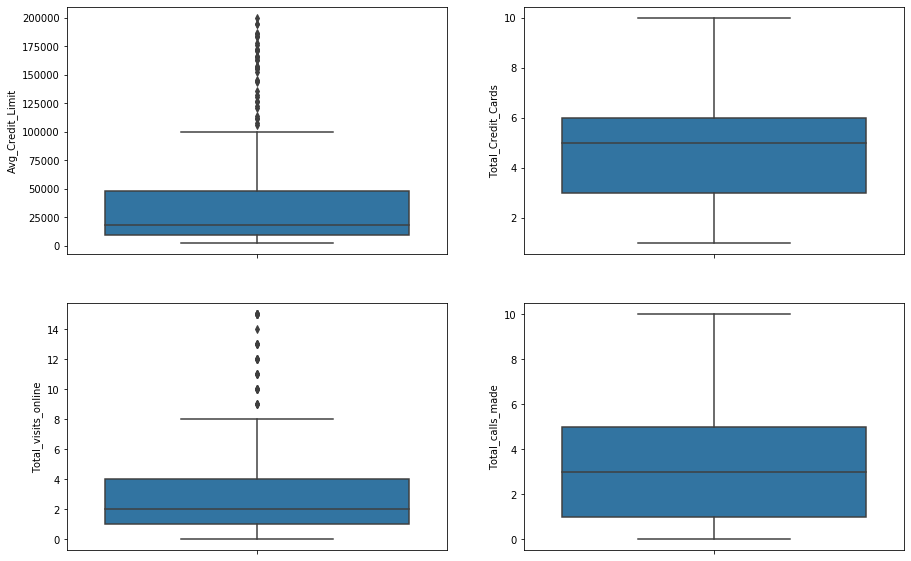

In [8]:
fix, ax = plt.subplots(2,2, figsize=(15,10))
for var, subplot in zip(df_data.columns, ax.flatten()):
    sns.boxplot(y=var, data=df_data, ax=subplot)

Both boxplot and describe on df_data dataframe shows that data is on a different range for each variable. Also, we have some outliers in our data for total visits and credit card limit.

Let`s verify how correlated is the data:

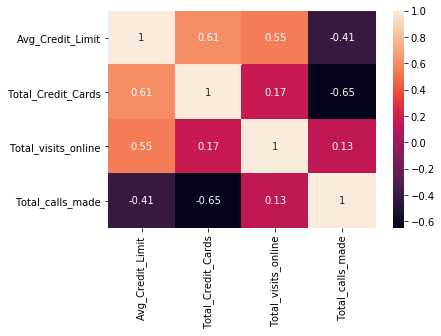

In [9]:
sns.heatmap(df_data.corr(), annot=True)

By the plot above we can see that there is a slight negative correlation between the total of credit cards and the total calls made. Same for the average credit limit. This can be a clue for the number of principal components to be applied on this dataset.

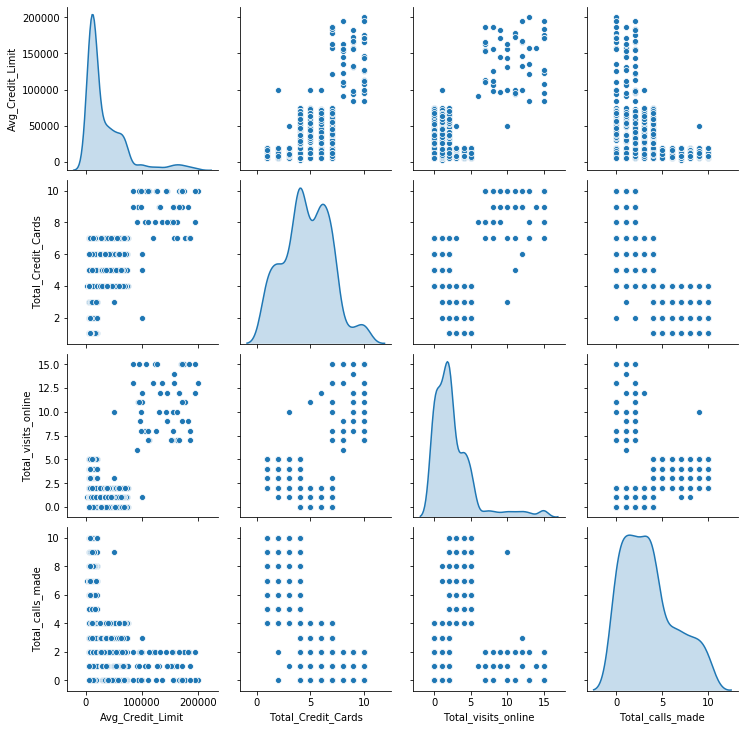

In [10]:
sns.pairplot(df_data, diag_kind='kde');

By this plot (the number of peaks found in main diagonal) we can see that for a clustering task, we may have <font color=red><b> at least 5 clusters </b></font>. Lets check it out using a K-means and elbow method.

### Data Preparation

Next, I`m going to apply zscore normalization on this data in order to have all data in the same scale: standard deviations.

In [71]:
def DataNormalization():
    return df_data.apply(zscore)

df_prep = DataNormalization()
df_prep.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.195465e-16,-4.006223e-15,1.944572e-16,-7.112156e-16
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,4.224968e+00,2.241125e+00


By the mean of all columns being around 0 and std being around 1, shows that zscore was sucessfully applied.

Let`s check again the pairplot to see if the number of clusters may still be 5 as we previously found.

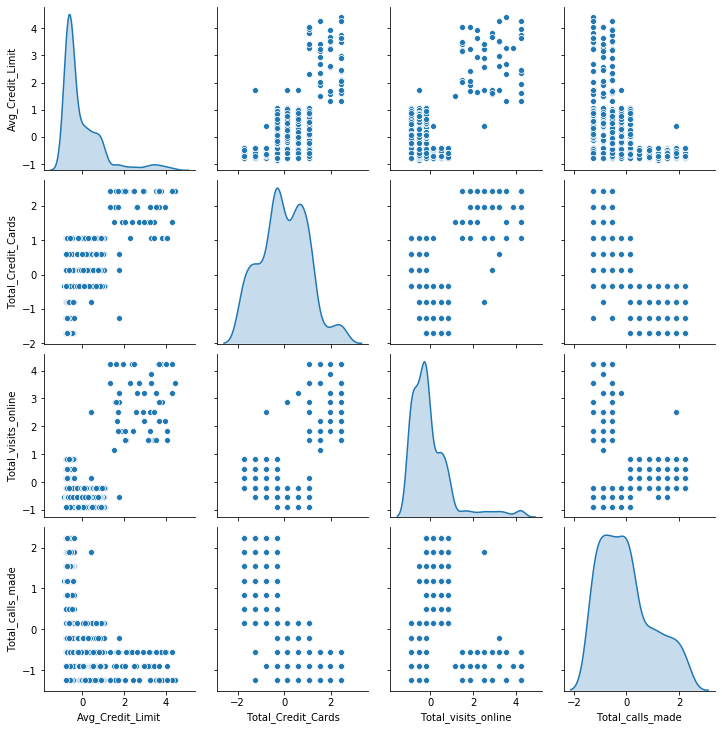

In [12]:
sns.pairplot(df_prep, diag_kind='kde');

That`s good, nothing changed.

I`ll try with 20 clusters.

Silhouette score for k=2:0.6205475748344302
Silhouette score for k=3:0.5198536876405379
Silhouette score for k=4:0.3608778844070273
Silhouette score for k=5:0.2971455890774944
Silhouette score for k=6:0.28775818679983695
Silhouette score for k=7:0.2680654766895931
Silhouette score for k=8:0.2688005010648736
Silhouette score for k=9:0.2709118415977879
Silhouette score for k=10:0.264019930795952
Silhouette score for k=11:0.27432668857489606
Silhouette score for k=12:0.28411622457204816
Silhouette score for k=13:0.2829825955904901
Silhouette score for k=14:0.2666567920187946
Silhouette score for k=15:0.27187683299313786
Silhouette score for k=16:0.27186994677654397
Silhouette score for k=17:0.2705904987080248
Silhouette score for k=18:0.272438450561551
Silhouette score for k=19:0.25677330605938753


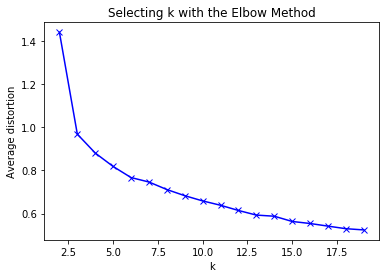

In [82]:
df_prep = DataNormalization()

clusters=range(2,20)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k, random_state=1)
    model1=KMeans(n_clusters=k, random_state=1)
    lbls = model1.fit_predict(df_prep)
    model.fit(df_prep)
    prediction=model.predict(df_prep)
    silhouette_avg = silhouette_score(df_prep, lbls)
    print('Silhouette score for k='+str(k)+':'+str(silhouette_avg))
    meanDistortions.append(sum(np.min(cdist(df_prep, model.cluster_centers_, 'euclidean'), axis=1)) / df_prep.shape[0])


ax = plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

By the elbow method I'd say that we can choose 5 or 7 clusters at most. This is because after 5 clusters there is little or almost no change in the average distortion between clusters.

Let`s evaluate the models with k=5, 6 and 7.

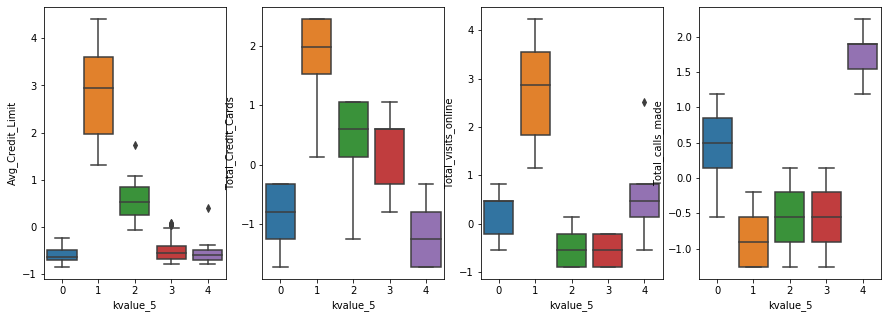

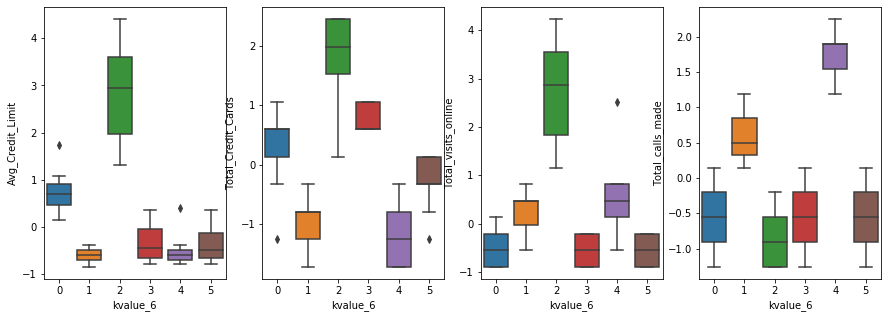

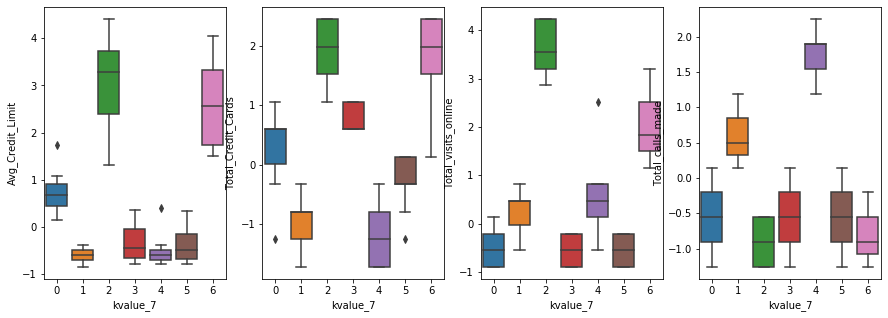

In [15]:
k_values = [5,6,7]

for k in k_values:
    mdl = KMeans(k, random_state=1)
    mdl.fit(df_prep)
    pred = mdl.predict(df_prep)
    
    df_prep['kvalue_'+str(k)] = pred
    
    fix, ax = plt.subplots(1,4, figsize=(15,5))
    for var, subplot in zip(df_prep.columns, ax.flatten()):
        sns.boxplot(y=var, x='kvalue_'+str(k), data=df_prep, ax=subplot)
        
    df_prep.drop('kvalue_'+str(k), axis=1, inplace=True)
    #sns.boxplot()

In our first line of boxplots we have five clusters. In cluster 1 we have the guys with highest credit limit, total credit cards and total call made. For k=6 and k=7 we can also notice some clusters with high values for these variables too. So, for sure its a distinct segment of customers on the whole dataset

#### Aglomerative Clustering

Let`s try different linkage methods for clustering in agglomerative clustering:

1. ward minimizes the variance of the clusters being merged.
2. average uses the average of the distances of each observation of the two sets.
3. complete or maximum linkage uses the maximum distances between all observations of the two sets.
4. single uses the minimum of the distances between all observations of the two sets.

In [24]:
links = ['ward','complete','average','single']

for lnk in links:
    
    Z = linkage(df_prep, metric='euclidean',method=lnk)
    c, coph_dists = cophenet(Z , pdist(df_prep))
    
    print('Cophenet index for '+lnk+' linkage is:', c)
    

Cophenet index for ward linkage is: 0.7653216557613748
Cophenet index for complete linkage is: 0.8846689915056236
Cophenet index for average linkage is: 0.8969069425723121
Cophenet index for single linkage is: 0.7750578864616895


By information above it`s easy to see that average linkage is the best linkage method for this clustering since a cophenet index near to 1 means the better is the clustering

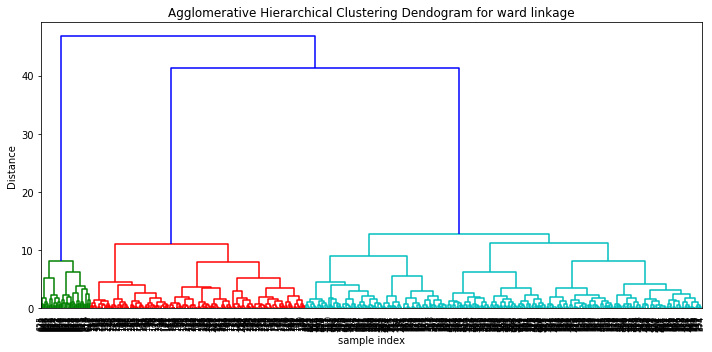

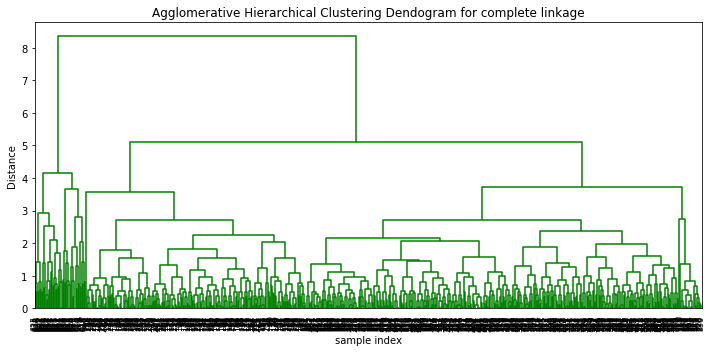

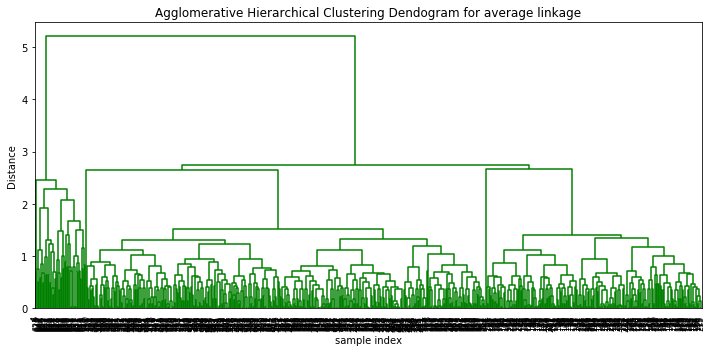

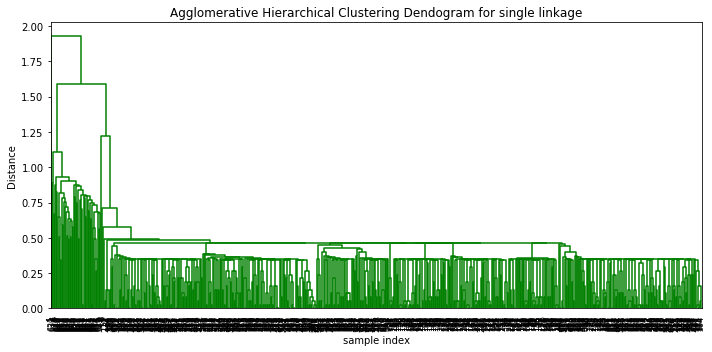

In [25]:
for lnk in links:
    Z = linkage(df_prep, metric='euclidean',method=lnk)
    plt.figure(figsize=(10, 5))
    plt.title('Agglomerative Hierarchical Clustering Dendogram for '+lnk+' linkage')
    plt.xlabel('sample index')
    plt.ylabel('Distance')
    dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
    plt.tight_layout()

Grafically we can see that single linkage seem to be the worst option. Let`s evaluate these clusters with boxplots.

Silhouette score for ward : 0.3155954252158924
Silhouette score for complete : 0.5057042935346912
Silhouette score for average : 0.6391952006912165
Silhouette score for single : 0.6559778197859569


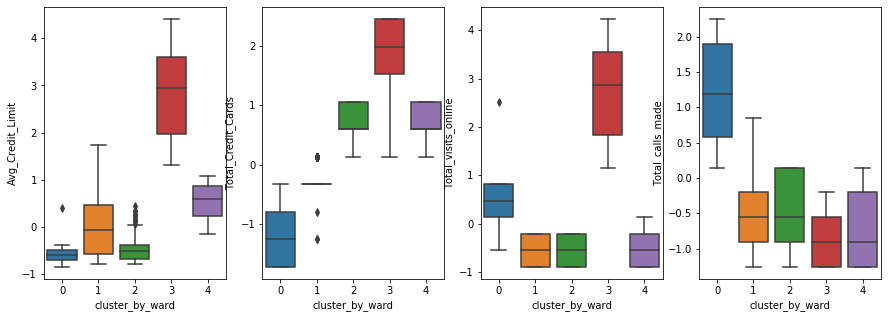

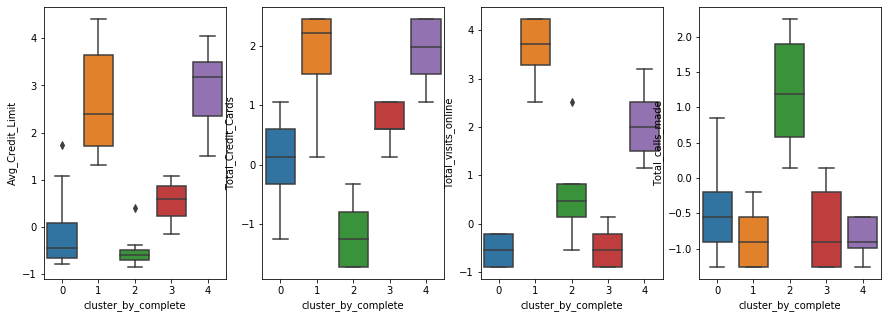

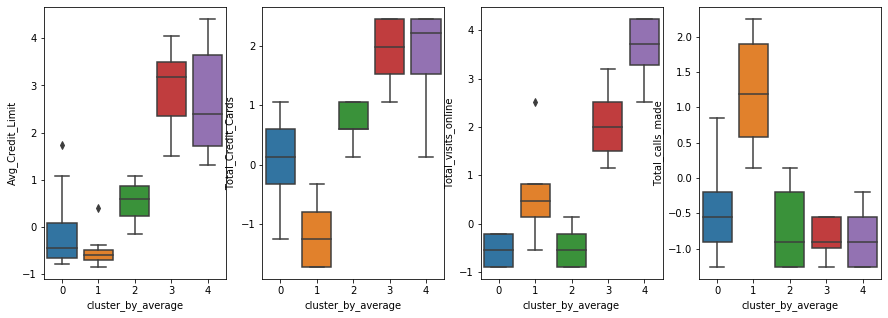

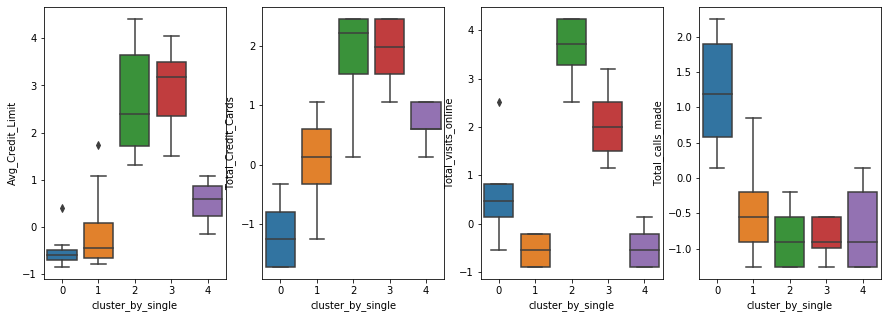

In [76]:
df_prep = DataNormalization()

for lnk in links:
    mdl1 = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage=lnk)
    
    mdl1.fit(df_prep)
    
    silhouette_avg = silhouette_score(df_prep, mdl1.labels_)
    print('Silhouette score for '+lnk+' :', silhouette_avg)
    
    df_prep['cluster_by_'+lnk] = mdl1.labels_
    
    
    
    var_x = 'cluster_by_'+lnk
    
    fix, ax = plt.subplots(1,4, figsize=(15,5))
    for var, subplot in zip(df_prep.columns, ax.flatten()):
        sns.boxplot(y=var, x=var_x, data=df_prep, ax=subplot)



#### K-means Clusters Vs Hierarchical Clustering

For this analysis Hierarchical Clustering seems to have a better performance than K-means, by the values of silhouette scores and for example for the boxplots on average linkage where we can see that the clusters are really differente between themselves.

#### Key Questions:

<b>How many different segments of customers are there?</b>

a:  There are 5 different segments of customers, accordling to this analysis.

<b>How are these segments different from each other?</b>

a: We have clusters 0 that is caracterized by having a Credit limit under the average (0,1) and clusters that have high Credit limit (2,3,4). For total Credit cards, cluster 1 shows that they are 1 sd far away from the average, and finally for Total Calls made, cluster 1 shows that they receive more phone calls than other customer segments.

<b>What are your recommendations to the bank on how to better market to and service these customers?</b>

a: Right now, stop to call customers from cluster 1, they are low profitable customers and require much more calls. I`d call this segment money pity customer.